In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pathlib import Path
import wquantiles

ModuleNotFoundError: No module named 'scipy'

# Estimates of Location

- **Mean**<br>
The sum of all values divided by the number of values. *Sensitive to outliers.*<br>
Synonym: average<br>

- **Weighted mean**<br>
The sum of all values times a weight divided by the sum of the weights.<br>
Synonym: weighted average<br>
- **Median**<br>
The value such that one-half of the data lies above and below. *Less sensitive to outliers.*<br>
Synonym: 50th percentile<br>
- **Percentile**<br>
The value such that P percent of the data lies below.<br>
Synonym: quantile<br>
- **Weighted median**<br>
The value such that one-half of the sum of the weights lies above and below the
sorted data.<br>
- **Trimmed mean**<br>
The average of all values after dropping a fixed number of extreme values.<br>
Synonym: truncated mean<br>
- **Robust**<br>
Not sensitive to extreme values.<br>
Synonym: resistant<br>
- **Outlier**<br>
A data value that is very different from most of the data.<br>
Synonym: extreme value<br>

In [ ]:
data_dir= Path('practical-statistics-for-data-scientists/data')
state= pd.read_csv((data_dir / 'state.csv'))
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
# mean
print(np.mean(state["Population"]))

# trimmed mean
print(stats.trim_mean(state["Population"], 0.1))

# median
print(np.median(state["Population"]))

6162876.3
4783697.125
4436369.5


In [ ]:
# weighted mean
print(np.average(state['Murder.Rate'], weights= state['Population']))

# weighted median
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.445833981123393
4.4


# Estimates of Variability

Variability measures whether the data calues are tightly clustered or spread out.

- **Deviations**<br>
The difference between the observed values and the estimate of location (usually mean).<br>
Synonyms: errors, residuals

- **Variance**<br>
The sum of squared deviations from the mean divided by n – 1 where n is the
number of data values. *Sensitive to outliers.*<br>

    $s^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \overline{x})^2} {n-1}$

    Synonym: mean-squared-error
    
- **Standard deviation**<br>
The square root of the variance. *Sensitive to outliers.*<br>

    $s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \overline{x})^2} {n-1}}$
    
    $s = \sqrt{variance}$

- **Mean absolute deviation**<br>
The mean of the absolute values of the deviations from the mean.<br>
Synonyms: l1-norm, Manhattan norm<br>
- **Median absolute deviation from the median**<br>
The median of the absolute values of the deviations from the median.<br>
- **Range**<br>
The difference between the largest and the smallest value in a data set.<br>
- **Order statistics**<br>
Metrics based on the data values sorted from smallest to biggest.<br>
Synonym: ranks<br>
- **Percentile**<br>
The value such that P percent of the values take on this value or less and (100–P)
percent take on this value or more.<br>
Synonym: quantile<br>
- **Interquartile range**<br>
The difference between the 75th percentile and the 25th percentile.<br>
Synonym: IQR<br>

In [ ]:
# deviation

array= [1, 4, 4]
mean= np.average(array)

dev= array - mean
dev

array([-2.,  1.,  1.])

In [ ]:
# mean absolute deviation

np.mean(abs(dev))

1.3333333333333333

In [ ]:
# variance

print(array)
print(dev)
var= np.sum(np.square(dev)) / (len(dev) - 1) # -1 to allow degree of freedom
print(var)

[1, 4, 4]
[-2.  1.  1.]
3.0


In [ ]:
# std

std= np.sqrt(var)
std

1.7320508075688772

In [ ]:
# median absolute dev

np.median(abs(dev))

1.0

In [ ]:
# percentile and IQR

array= np.array(list(range(1, 9)))
print(sorted(array))

perc_25= np.percentile(array, 25, method= 'midpoint')
perc_75= np.percentile(array, 75, method= 'midpoint')
iqr= perc_75 - perc_25

perc_25, perc_75, iqr

[1, 2, 3, 4, 5, 6, 7, 8]


(2.5, 6.5, 4.0)

In [ ]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
std= state['Population'].std()
iqr= state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
from statsmodels.robust.scale import mad
mad= mad(state['Population'])

std, iqr, mad

(6848235.347401142, 4847308.0, 3849876.1459979336)

# Data Distribution

- **Boxplot**:
A plot introduced by Tukey as a quick way to visualize the distribution of data.
Synonym: box and whiskers plot

- **Frequency table**:
A tally of the count of numeric data values that fall into a set of intervals (bins).

- **Histogram**:
*A plot of the frequency table* with the bins on the x-axis and the count (or proportion) on the y-axis. While visually similar, bar charts should not be confused with histograms.

- **Density plot**:
A smoothed version of the histogram, often based on a kernel density estimate.

In [ ]:
# percentile

state['Murder.Rate'].quantile([
    0.05, 0.25, 0.50, 0.75, 0.95
])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

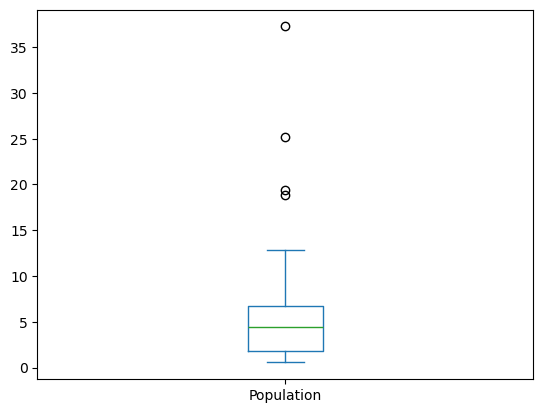

In [ ]:
# boxplot

import matplotlib.pyplot as plt
(state['Population'] / 1_000_000).plot.box() #make y in million
plt.show()

In [ ]:
# freq table
# A frequency table of a variable divides up the variable range into equally 
# spaced segments and tells us how many values fall within each segment. 

binned_pop= pd.cut(state['Population'], bins= 10)
pd.DataFrame(binned_pop.value_counts()).sort_index()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(26246857.0, 29915890.0]",0
"(29915890.0, 33584923.0]",0


In [ ]:
state['Population'].max()

37253956

In [ ]:
range_ =state['Population'].max() - state['Population'].min()
range_/10

3669033.0

In [ ]:
state['Population'].min() + (range_/10)

4232659.0

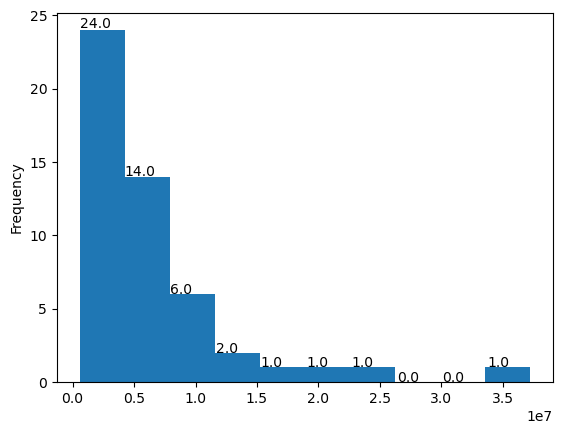

In [ ]:
# histogram

ax= state['Population'].plot.hist(bins= 10)
for p in ax.patches:
    ax.annotate(
        text= str(p.get_height()), 
        xy= (
            p.get_x() * 1.005, 
            p.get_height() * 1.005
            )
        )
plt.show()

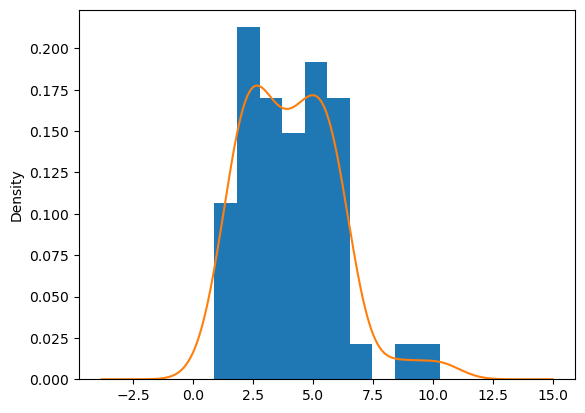

In [ ]:
# density plot

ax= state['Murder.Rate'].plot.hist(bins= 10, density= True)
ax= state['Murder.Rate'].plot.density()
plt.show()

# Exploring Binary and Cat Data

- **Mode**<br>
The most commonly occurring category or value in a data set.<br>

- **Expected value**<br>
When the categories can be associated with a numeric value, this gives an average
value based on a category’s probability of occurrence.<br>
- **Bar charts**<br>
The frequency or proportion for each category plotted as bars.<br>
- **Pie charts**<br>
The frequency or proportion for each category plotted as wedges in a pie.<br>

In [ ]:
path= data_dir / 'dfw_airline.csv'
dfw= pd.read_csv(path)
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


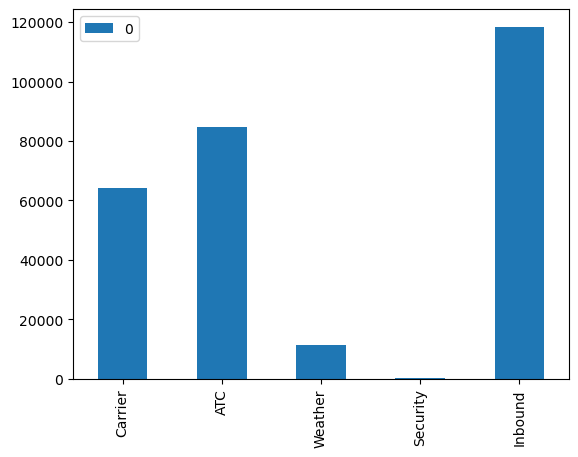

In [ ]:
# bar chart

dfw.transpose().plot.bar()
plt.show()

# Correlation

**Correlation coefficient**:
A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1). *Sensitive to outliers.*

**Correlation matrix**:
A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.

**Scatterplot**:
A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

In [ ]:
df= pd.DataFrame(
    np.random.randint(10, size= (4, 4))
)
df.columns= ['a', 'b', 'c', 'd']
df

,a,b,c,d
0,1,6,8,9
1,7,6,3,4
2,9,4,8,9
3,2,0,1,9


In [ ]:
df.corr()

,a,b,c,d
a,1.000000,0.244111,0.194000,-0.388379
b,0.244111,1.000000,0.596040,-0.471405
c,0.194000,0.596040,1.000000,0.374634
d,-0.388379,-0.471405,0.374634,1.000000


<Axes: >

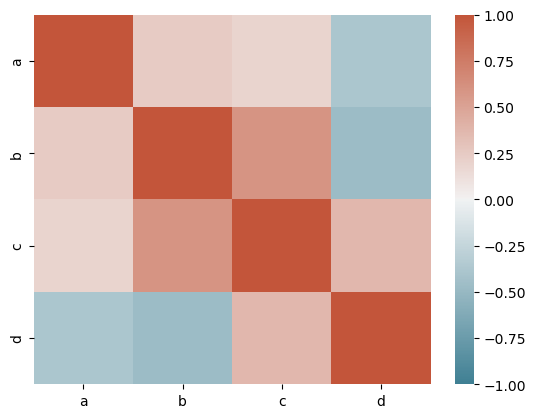

In [ ]:
import seaborn as sns
sns.heatmap(
    df.corr(), 
    cmap= sns.diverging_palette(220, 20, as_cmap= True),
    vmin= -1, vmax= 1
    )

## Exploring 2 or More Vars

**Contingency table**:
A tally of counts between two or more categorical variables.

**Hexagonal binning**:
A plot of two numeric variables with the records binned into hexagons.

**Contour plot**:
A plot showing the density of two numeric variables like a topographical map.

**Violin plot**:
Similar to a boxplot but showing the density estimate.

In [ ]:
data= pd.DataFrame(
    np.random.normal(10, 2, size= (1_000_000, 2)) + np.random.randint(0, 10, size= (1_000_000, 2))
    )

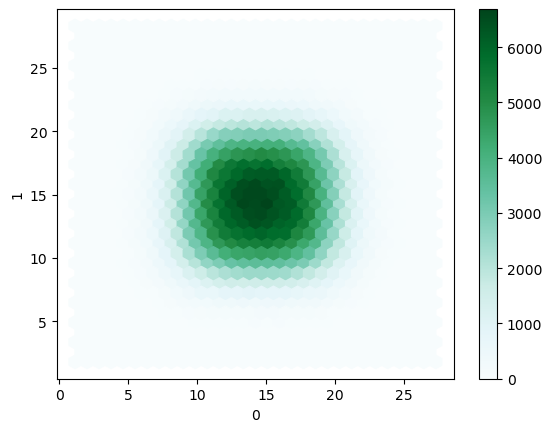

In [ ]:
data.plot.hexbin(x= 0, y= 1, gridsize= 30)
plt.show()

In [ ]:
path= 'practical-statistics-for-data-scientists/data/kc_tax.csv.gz'

import gzip
with gzip.open(path) as f:
    kc_tax = pd.read_csv(f)

kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax.loc[kc_tax.ZipCode.isin(zip_codes),:]
kc_tax_zip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


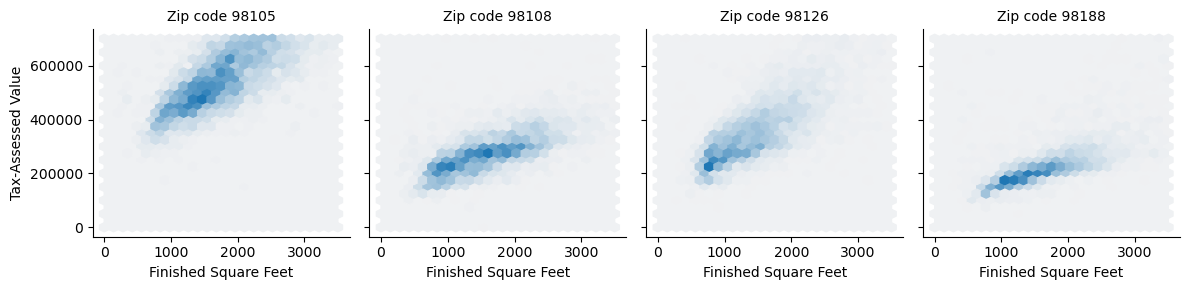

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap= 4)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
    extent=[0, 3500, 0, 700000]) # xlim and ylim

g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')
plt.show()